In [1]:
import json
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup
from collections import Counter, defaultdict
import seaborn as sns

headers = {"User-Agent": "My User Agent"}

In [ ]:
start_username = input()

In [7]:
profile = f"/profile/{start_username}"

page = requests.get(f"https://mydramalist.com{profile}", headers=headers)
soup = BeautifulSoup(page.text)
profile2friends = {f'/profile/{start_username}': ['/profile/pinkmoonlight']}
profile2page = {}

In [42]:
for profile in tqdm(
    set(
        [profile for profiles in profile2friends.values() for profile in profiles]
    ) - set(profile2friends.keys())
):

    if profile not in profile2page:
        page = requests.get(f"https://mydramalist.com{profile}", headers=headers)
        soup = BeautifulSoup(page.text)
        profile2friends[profile] = [x["href"] for x in soup.find_all("a", {"class": "w-38 avatar"}, href=True)]
        profile2page[profile] = page.text

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.69it/s]


In [53]:
len(profile2friends)

52983

In [44]:
len(
    set([profile for profiles in profile2friends.values() for profile in profiles]
       ) - set(profile2friends.keys())
)

0

In [45]:
%%time
with open("data/profile2page.json", "w", encoding="utf-8") as fw:
    json.dump(profile2page, fw, ensure_ascii=False)

CPU times: total: 25 s
Wall time: 25.7 s


In [54]:
with open("data/profile2friends.json", "w", encoding="utf-8") as fw:
    json.dump(profile2friends, fw, ensure_ascii=False)

In [64]:
# dramalist2page = {}

for profile in tqdm(profile2friends):
    
    dramalist = f"/dramalist/{profile.split('/')[-1]}"
    
    if dramalist not in dramalist2page:
        
        page = requests.get(f"https://mydramalist.com{dramalist}", headers=headers)
        dramalist2page[dramalist] = page.text

100%|█████████████████████████████████████████████████████████████████████████| 52983/52983 [10:07:21<00:00,  1.45it/s]


In [91]:
with open("data/dramalist2page.json", "w", encoding="utf-8") as fw:
    json.dump({k:v for i, (k,v) in enumerate(dramalist2page.items()) 
               # if 50_000 <= i # < 50_000
              }, fw, ensure_ascii=False)

In [82]:
# !pip3 install lxml

In [96]:
[x.get_text() for x in soup.find_all("h3", {"class": "mdl-style-list-label"})]

['Currently Watching', 'Completed', 'Plan to Watch', 'On-hold', 'Dropped']

In [99]:
username2tablenames = {}

etalon_tablenames = ['Currently Watching', 'Completed', 'Plan to Watch', 'On-hold', 'Dropped']

for i, (dramalist, page_text) in tqdm(enumerate(dramalist2page.items()), total=len(dramalist2page)):
    username = dramalist.split("/")[-1]
    if username not in username2tablenames:
        soup = BeautifulSoup(page_text)
        tablenames = [x.get_text() for x in soup.find_all("h3", {"class": "mdl-style-list-label"})]
        if tablenames != etalon_tablenames:
            
            username2tablenames[username] = tablenames

100%|██████████████████████████████████████████████████████████████████████████| 52983/52983 [4:52:10<00:00,  3.02it/s]


In [100]:
len(username2tablenames)

28363

In [101]:
with open("data/username2tablenames.json", "w", encoding="utf-8") as fw:
    json.dump(username2tablenames, fw, ensure_ascii=False)

In [12]:
title2hrefs = defaultdict(Counter)

for i, profile in tqdm(enumerate(profile2friends.keys()), total=len(profile2friends)):
    
    if i >= 11775:
    
        username = profile.split('/')[-1]
        dramalist = f"/dramalist/{username}"

        page = requests.get(f"https://mydramalist.com{dramalist}", headers=headers)
        soup = BeautifulSoup(page.text)

        for x in soup.find_all("a", {"class": "title text-primary _600"}, href=True):
            title2hrefs[
                x.get_text()
            ].update([
                x["href"]
            ])

100%|██████████████████████████████████████████████████████████████████████████| 52983/52983 [7:52:20<00:00,  1.87it/s]


In [23]:
with open("data/title2hrefs.json", "w", encoding="utf-8") as fw:
    json.dump(title2hrefs, fw, ensure_ascii=False)

In [22]:
[v for k, v in title2hrefs.items() if len(v) == 8]

[Counter({'/2380-the-promise': 394,
          '/27732-pangako-sa-yo': 143,
          '/16287-the-promise': 953,
          '/28307-the-promise': 19,
          '/27525-the-promise': 182,
          '/743733-the-promise': 36,
          '/52377-the-promise': 5,
          '/693511-i-can-see-you-the-promise': 3}),
 Counter({'/19810-one-day': 367,
          '/18926-one-day': 1072,
          '/1850-one-day': 450,
          '/735335-one-day': 9,
          '/722665-one-day': 6,
          '/44087-one-day': 2,
          '/23497-one-day': 5,
          '/49277-one-day': 1})]

# Recently Watched By

In [2]:
with open("data/num2dramapage.json", encoding="utf-8") as f:
    num2dramapage = json.load(f)

In [20]:
# num2rwbprofiles = {}

# for num, dramapage in tqdm(num2dramapage.items()):
#     soup = BeautifulSoup(dramapage)
#     res = soup.find_all("span", {"class": "w-38 avatar in-link"})
#     num2rwbprofiles[num] = [r["data-href"] for r in res]

100%|████████████████████████████████████████████████████████████████████████████| 12079/12079 [18:31<00:00, 10.87it/s]


In [6]:
with open("data/profile2friends.json", encoding="utf-8") as f:
    profile2friends = json.load(f)

In [24]:
len(set([profile for v in num2rwbprofiles.values() for profile in v]))

29496

In [23]:
len(profile2friends)

52983

In [25]:
len(
    set(profile2friends.keys()) 
    & set([profile for v in num2rwbprofiles.values() for profile in v])
)

8809

In [26]:
len(
    set([profile for v in num2rwbprofiles.values() for profile in v])
    - set(profile2friends.keys())
)
# unfriendly profiles

20687

In [2]:
# %%time
# with open("data/rwbprofiles_from_numdramapages.json", "w", encoding="utf-8") as fw:
#     json.dump(
#         sorted(set([profile for v in num2rwbprofiles.values() for profile in v]))
#         , fw, ensure_ascii=False)

In [7]:
with open("data/rwbprofiles_from_numdramapages.json", encoding="utf-8") as f:
    rwbprofiles_from_numdramapages = json.load(f)

In [3]:
with open("data/href2dramapage.json", encoding="utf-8") as f:
    href2dramapage = json.load(f)

In [4]:
href2rwbprofiles = {}

for href, dramapage in tqdm(href2dramapage.items()):
    soup = BeautifulSoup(dramapage)
    res = soup.find_all("span", {"class": "w-38 avatar in-link"})
    href2rwbprofiles[href] = [r["data-href"] for r in res]

100%|████████████████████████████████████████████████████████████████████████████| 19462/19462 [34:26<00:00,  9.42it/s]


In [8]:
len([profile for v in href2rwbprofiles.values() for profile in v])

453742

In [9]:
len(set([profile for v in href2rwbprofiles.values() for profile in v]))

75483

In [11]:
len(
    set([profile for v in href2rwbprofiles.values() for profile in v]) - 
    (set(profile2friends.keys()) | set(rwbprofiles_from_numdramapages))
)

44813

In [12]:
with open("data/rwbprofiles_from_dramapages.json", "w", encoding="utf-8") as fw:
    json.dump(
        sorted(set([profile for v in href2rwbprofiles.values() for profile in v]))
        , fw, ensure_ascii=False)

In [13]:
len(
    set([profile for v in href2rwbprofiles.values() for profile in v]) 
    | set(profile2friends.keys())
    | set(rwbprofiles_from_numdramapages)
)

118483

In [20]:
# unfriendly2friends = {}

progress_bar = tqdm(
    (
        set(rwbprofiles_from_numdramapages) 
        | set([profile for v in href2rwbprofiles.values() for profile in v])
    ) - set(profile2friends.keys())

)
    
for profile in progress_bar:

    if profile not in unfriendly2friends:
        page = requests.get(f"https://mydramalist.com{profile}", headers=headers)
        soup = BeautifulSoup(page.text)
        friends = [x["href"] for x in soup.find_all("a", {"class": "w-38 avatar"}, href=True)]
        if friends:
            unfriendly2friends[profile] = friends
            progress_bar.set_description(f"{profile} has friends")

/profile/9122993 has friends: 100%|████████████████████████████████████████████| 65500/65500 [9:21:13<00:00,  1.95it/s]


In [21]:
# with open("data/unfriendly2friends.json", "w", encoding="utf-8") as fw:
#     json.dump(
#         unfriendly2friends
#         , fw, ensure_ascii=False)

In [2]:
with open("data/unfriendly2friends.json", encoding="utf-8") as f:
    unfriendly2friends = json.load(f)

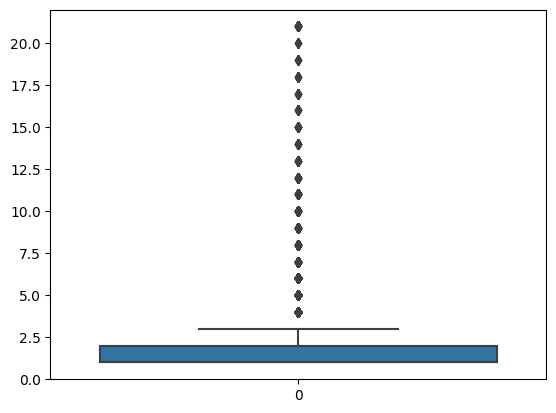

In [6]:
sns.boxplot(
    list(map(len, unfriendly2friends.values()))
);

In [8]:
profile_prefix = "/profile/"

numprofiles = []
for profile in unfriendly2friends.keys():
    
    try:
        numprofiles.append(
            int(profile[len(profile_prefix):])
        )
    except:
        pass

In [14]:
min(numprofiles), max(numprofiles)

(689, 100132363)

In [13]:
len(numprofiles)

2790

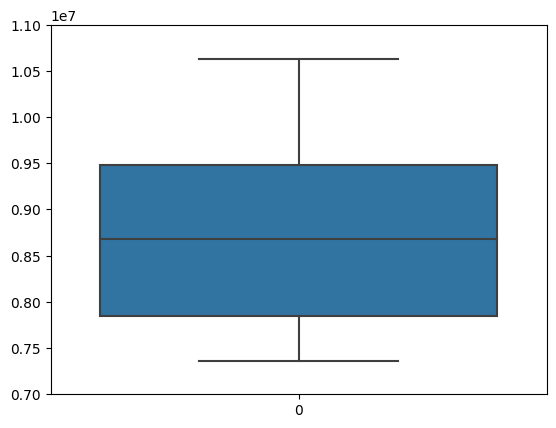

In [29]:
ax = sns.boxplot(numprofiles)
ax.set(ylim=(7_000_000, 11_000_000));